In [1]:
import numpy as np

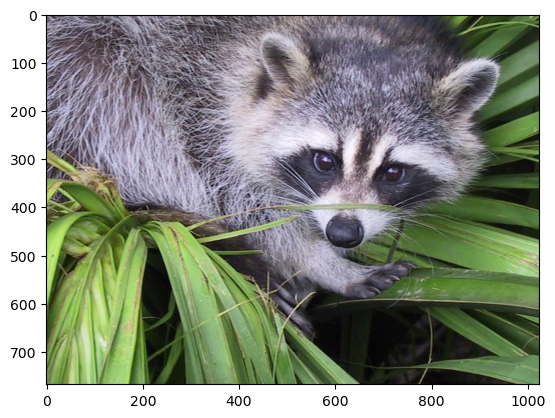

In [3]:
from scipy import misc
import matplotlib.pyplot as plt

f = misc.face()
plt.imshow(f)
plt.show()

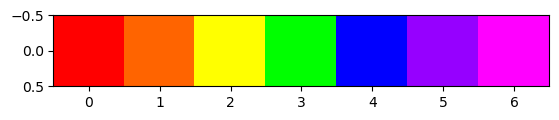

In [4]:
import numpy as np
a = np.array([[[255,0,0], [255,100,0], [255,255,0], [0,255,0], [0,0,255], [150,0,255], [255,0,255]]])
plt.imshow(a)

## Spelen met kleurtjes

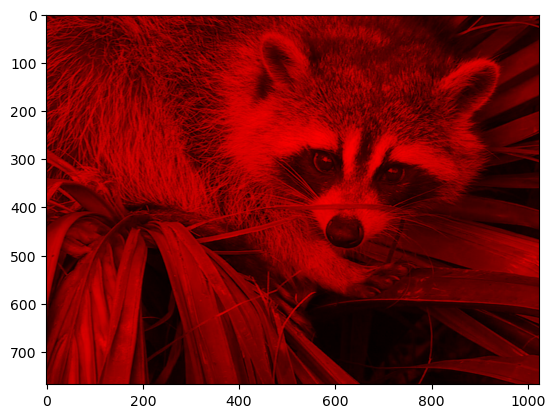

In [5]:
red_f = f.copy()
red_f[:,:,[1,2]] = 0
plt.imshow(red_f)
plt.show()

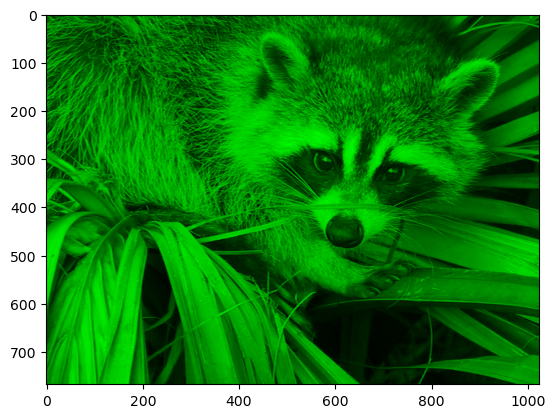

In [6]:
green_f = f.copy()
green_f[:,:,[0,2]] = 0
plt.imshow(green_f)
plt.show()

## Afbeelding heel erg rood maken

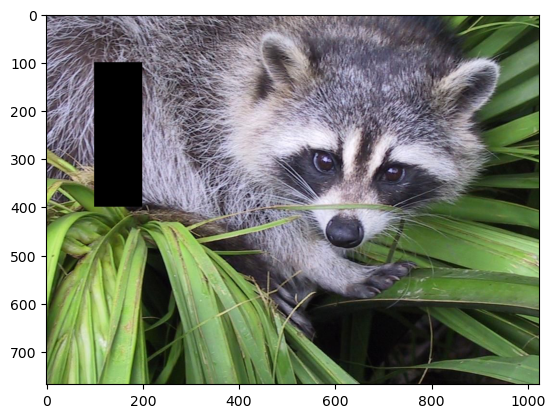

In [16]:
f_reddish = f.copy()
height,width = f_reddish.shape[:2] #get width and height of image
f_reddish[100:400, 100:200, :] = 0
plt.imshow(f_reddish)
plt.show()

## Kleurenruis op afbeelding zetten

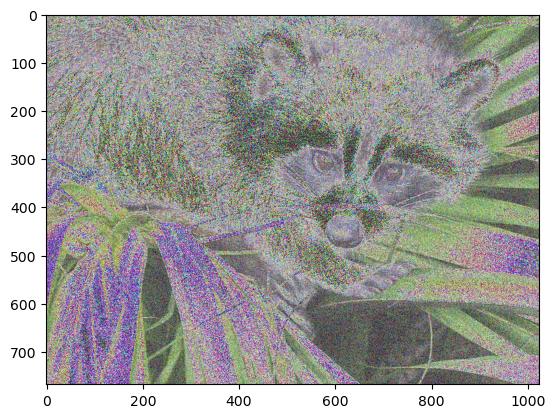

In [29]:
f_blurred = f.copy()
lb = 0
ub = 150
height,width = f_blurred.shape[:2] #get width and height of image
f_blurred[:,:,0] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
f_blurred[:,:,1] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
f_blurred[:,:,2] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
plt.imshow(f_blurred)
plt.show()

## Minder detail in afbeelding

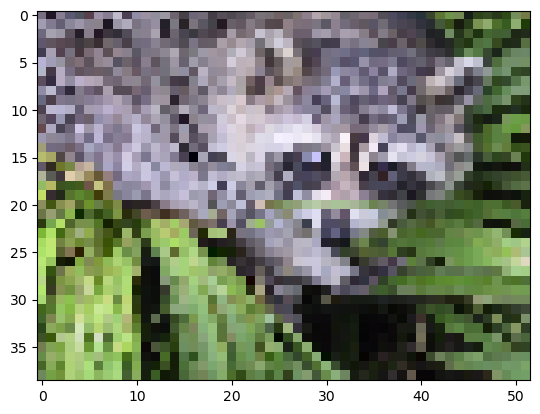

In [27]:
plt.imshow(f[::20, ::20, :])
plt.show()

## Volledig zwart wit maken

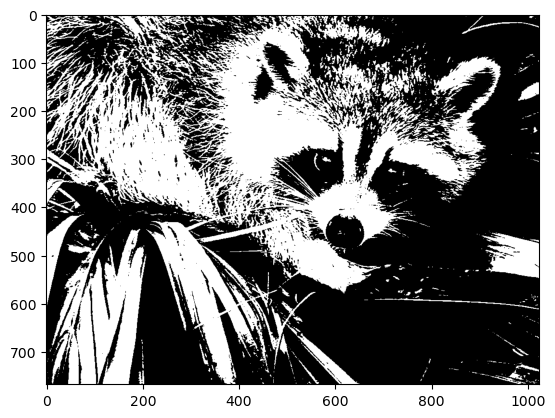

In [39]:
f_bw = f.copy()
f_bw = f_bw.astype(float)
f_bw = f_bw.sum(axis = 2)
f_bw /= f_bw.max()
f_bw = np.round(f_bw)
plt.imshow(f_bw, cmap=plt.cm.gray)
plt.show()

## Rotatie

Dit kan ook veel eenvoudiger met voorgedefinieerde functies; zie hier: https://www.pythonpool.com/python-rotate-image/

Wij maken hier gebruik van een implementatie van https://medium.com/@bosssds65/how-to-rotate-image-using-only-numpy-in-15-lines-ddc1fca93c87

In [40]:
def change_angle_to_radius_unit(angle):
    angle_radius = angle * (np.pi/180)
    return angle_radius

def rotate(src_img,angle_of_rotation,pivot_point,shape_img):

    #1.create rotation matrix with numpy array
    rotation_mat = np.transpose(np.array([[np.cos(angle_of_rotation),-np.sin(angle_of_rotation)],
                            [np.sin(angle_of_rotation),np.cos(angle_of_rotation)]]))
    h,w = shape_img
    
    pivot_point_x =  pivot_point[0]
    pivot_point_y = pivot_point[1]
    
    new_img = np.zeros(src_img.shape,dtype='u1') 

    for height in range(h): #h = number of row
        for width in range(w): #w = number of col
            xy_mat = np.array([[width-pivot_point_x],[height-pivot_point_y]])
            
            rotate_mat = np.dot(rotation_mat,xy_mat)

            new_x = pivot_point_x + int(rotate_mat[0])
            new_y = pivot_point_y + int(rotate_mat[1])


            if (0<=new_x<=w-1) and (0<=new_y<=h-1): 
                new_img[new_y,new_x] = src_img[height,width]

    return new_img

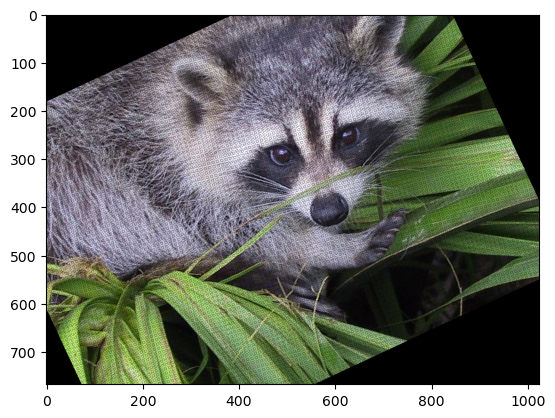

In [41]:
f_rotated = f.copy()
height,width = f_rotated.shape[:2] #get width and height of image
f_rotated = rotate(f_rotated.copy(),change_angle_to_radius_unit(25),(500, 500),(height,width))
plt.imshow(f_rotated)
plt.show()

## Zonder de afbeelding te verliezen: padden!

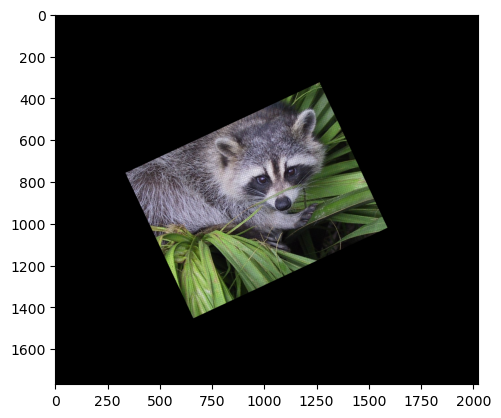

In [42]:
f_rotated = f.copy()
f_rotated = np.pad(f_rotated, pad_width=[(500, 500),(500, 500),(0, 0)], mode='constant')
height,width = f_rotated.shape[:2] #get width and height of image
f_rotated = rotate(f_rotated.copy(),change_angle_to_radius_unit(25),(1000, 1000),(height,width))
plt.imshow(f_rotated)
plt.show()